In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
def throw_dice():
    x = random.randint(1,6)
    return x

In [3]:
random.seed(81)
np.random.seed(81)

In [13]:

int((datetime(2023,8, 31)-datetime(2018, 1, 1)).days/364)

5

In [15]:
# Create empty lists to store data
dates = []
pulse_values = []
egfr_values = []
gender_values = []
alco_values = []
haemo_values = []
albumin_values = []
age_values = []
status_val = []
patient_id = []
patients = list(np.arange(4500,7500))

# Define the Heart rate intervals
pulse_intervals = [(50, 60), (61, 70), (71, 80), (81, 90), (91,100), (101, 110)]

#Define eGFR intervals
egfr_intervals = [(0, 15), (16, 30), (31, 60), (61, 90), (91,105),(106,120)]

#Haemoglobin intervals
haemo_intervals = [(8,11),(13.6,17.7),(12.1,15.1)]

#Albumin intervals
albumin_intervals = [(25,34),(34,40),(40,48)]

# Generate random datetime values
start_date = datetime(2018, 1, 1)
end_date = datetime(2023,8, 31)

for _ in range(1500):
    # Generate a random datetime within the specified range
    num_visits = random.randint(2,10)
    pat_id = patients[_]
    gender = random.choice(["M","F"])[0]
    alco = random.choice(["Yes","No"])[0]
    ag = round(random.randint(28,92),2)
    first_date = start_date + timedelta(days=random.randint(0, 364*4))  
    last_visit = first_date
    for visit in range(num_visits):
        if visit==1:
            dates.append(first_date)
            age_values.append(ag)
        else:
            another_visit = last_visit + timedelta(days=random.randint(0, 364*0.5))  #other visit within 6 months
            dates.append(another_visit)
            last_visit = another_visit
            
            curr_ag = ag + int((another_visit - first_date).days / 364) #year elpased after first visit
            age_values.append(curr_ag)
            
        gender_values.append(gender)
        alco_values.append(alco)
        
        patient_id.append(pat_id)

        # Generate a random BP rate within one of the defined intervals
        id1 = throw_dice()
        pulse_interval = pulse_intervals[id1-1]
        pulse_value = random.randint(pulse_interval[0], pulse_interval[1])
        pulse_values.append(pulse_value)
        
        #generate a random egfr value
        id2 = throw_dice()
        gfr_interval = egfr_intervals[id2-1]
        gfr_value = random.randint(gfr_interval[0], gfr_interval[1])
        egfr_values.append(gfr_value)
        
        #generate random haemoglobin value
        num = np.random.uniform(0,1)
        id3 = 1 if num<0.33 else (2 if num<0.66 else 3)
        haemo_interval = haemo_intervals[id3-1]
        haemo_value = round(random.uniform(haemo_interval[0], haemo_interval[1]),2)
        haemo_values.append(haemo_value)
        
        #generate random albumin value
        num = np.random.uniform(0,1)
        id4 = 1 if num<0.33 else (2 if num<0.66 else 3)
        albumin_interval = albumin_intervals[id4-1]
        albumin_val = round(random.uniform(albumin_interval[0], albumin_interval[1]),1)
        albumin_values.append(albumin_val)
        
        if visit == random.randint(4,10):
            status_val.append(0)
            break
        if(id3==1 and gender=="F" and id2<=3 and id4==1):  #low haemoglobin in Female with lower eGFR and low albumin
            status_val.append(1)
            break
        if(id2==2 and id1<=2 and id4==1): #low egfr with low pulse and low albumin
            status_val.append(1)
            break
        if(ag>80 and id4==1):           #age>80 and low albumin
            status_val.append(1)
            break
        else:
            status_val.append(0)

# Create a pandas DataFrame
data = {'Patient':patient_id,'Date': dates, 'Pulse': pulse_values, 'eGFR':egfr_values,'Gender':gender_values,
        'Alcohol':alco_values,'Haemoglobin':haemo_values,'Albumin':albumin_values,'Age':age_values,'Status': status_val}
df = pd.DataFrame(data)

# Sort the DataFrame by date
df.sort_values(by='Date', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(df)


      Patient       Date  Pulse  eGFR Gender Alcohol  Haemoglobin  Albumin  \
0        5477 2018-01-02     98    99      F       N        15.09     27.6   
1        4701 2018-01-02     85    22      F       N        16.73     33.8   
2        5724 2018-01-02     76    65      F       N        14.86     38.3   
3        4896 2018-01-04     98    75      M       N         8.51     45.2   
4        5854 2018-01-05     54    39      M       Y        15.04     47.6   
...       ...        ...    ...   ...    ...     ...          ...      ...   
6808     5373 2024-03-21     57   110      M       N        13.64     36.4   
6809     5737 2024-03-30     56    97      M       Y        14.50     25.5   
6810     4914 2024-04-30    110    87      M       Y         8.61     35.8   
6811     5191 2024-06-24     61    11      F       N        14.96     33.9   
6812     5300 2024-07-27     88   115      M       N        14.63     45.7   

      Age  Status  
0      31       0  
1      28       0  
2  

In [16]:
print(df.groupby(['Patient']).count())
df[df['Patient']==4502]

         Date  Pulse  eGFR  Gender  Alcohol  Haemoglobin  Albumin  Age  Status
Patient                                                                       
4500        4      4     4       4        4            4        4    4       4
4501        7      7     7       7        7            7        7    7       7
4502        6      6     6       6        6            6        6    6       6
4503        6      6     6       6        6            6        6    6       6
4504        5      5     5       5        5            5        5    5       5
...       ...    ...   ...     ...      ...          ...      ...  ...     ...
5995        6      6     6       6        6            6        6    6       6
5996        1      1     1       1        1            1        1    1       1
5997        4      4     4       4        4            4        4    4       4
5998       10     10    10      10       10           10       10   10      10
5999        4      4     4       4        4         

,Patient,Date,Pulse,eGFR,Gender,Alcohol,Haemoglobin,Albumin,Age,Status
1630,4502,2019-07-16,101,91,F,N,8.50,40.6,52,0
2100,4502,2019-10-27,77,118,F,N,15.82,44.7,52,0
2366,4502,2019-12-31,60,47,F,N,12.74,45.5,52,0
2444,4502,2020-01-18,70,70,F,N,13.18,46.3,52,0
2742,4502,2020-03-16,66,111,F,N,16.68,26.0,52,0
3110,4502,2020-06-02,82,64,F,N,8.20,26.4,52,0


In [17]:
df.groupby(['Patient']).count().value_counts()

Date  Pulse  eGFR  Gender  Alcohol  Haemoglobin  Albumin  Age  Status
2     2      2     2       2        2            2        2    2         248
5     5      5     5       5        5            5        5    5         212
3     3      3     3       3        3            3        3    3         211
6     6      6     6       6        6            6        6    6         182
4     4      4     4       4        4            4        4    4         172
1     1      1     1       1        1            1        1    1         143
7     7      7     7       7        7            7        7    7         126
8     8      8     8       8        8            8        8    8          90
9     9      9     9       9        9            9        9    9          61
10    10     10    10      10       10           10       10   10         55
dtype: int64

In [18]:
df['Status'].value_counts()

0    6348
1     465
Name: Status, dtype: int64

In [19]:
df['Patient'].value_counts()

4697    10
5432    10
5665    10
5710    10
4821    10
        ..
4877     1
5757     1
4542     1
4674     1
4806     1
Name: Patient, Length: 1500, dtype: int64

Int64Index([4697, 5432, 5665, 5710, 4821, 5733, 4829, 5775, 5340, 5985,
            ...
            5485, 4740, 5224, 5309, 4692, 4877, 5757, 4542, 4674, 4806],
           dtype='int64', length=1500)
[10 10 10 ...  1  1  1]


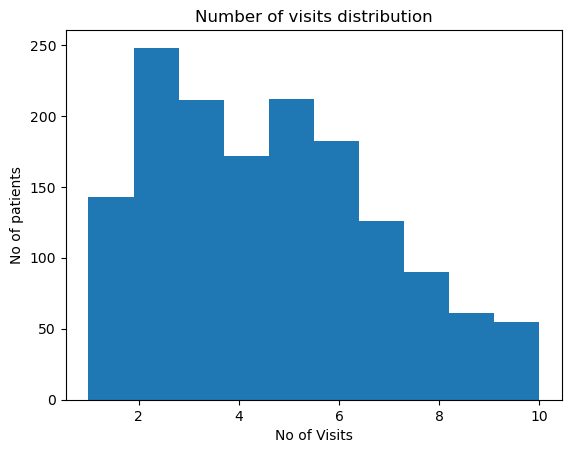

In [20]:
x = df['Patient'].value_counts().index
y = df['Patient'].value_counts().values
print(x)
print(y)
plt.hist(list(y))
plt.xlabel("No of Visits")
plt.ylabel("No of patients")
plt.title("Number of visits distribution")
plt.show()

In [21]:
print(df.groupby(['Patient'])['Status'].count())

Patient
4500     4
4501     7
4502     6
4503     6
4504     5
        ..
5995     6
5996     1
5997     4
5998    10
5999     4
Name: Status, Length: 1500, dtype: int64


In [22]:
df.groupby(['Patient']).sum().reset_index()['Status'].value_counts()

0    1035
1     465
Name: Status, dtype: int64

In [23]:
df['Alcohol_num'] = df['Alcohol'].map({'Y': 1, 'N': 0})
df['gender_num'] = df['Gender'].map({'F': 1, 'M': 0})

In [24]:
df.to_csv('synthetic.csv')